<a href="https://colab.research.google.com/github/victorncg/aulas_palestras/blob/main/20210818_C%C3%B3digo_Ibmec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

     |████████████████████████████████| 4.4 MB 16.5 MB/s 
     |████████████████████████████████| 241 kB 82.1 MB/s 
     |████████████████████████████████| 6.3 MB 46.0 MB/s 
     |████████████████████████████████| 510 kB 78.6 MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-py3-none-any.whl size=4495221 sha256=ec2e59d9cf79f9c7df7e48d5395f93e5f06c66621e3d8ea39bd2fa4e590455ee
  Stored in directory: /root/.cache/pip/wheels/50/bb/ee/760eeb6cc7ed8efc1b1b23b13b6b9f17fb1ed530fb04bd16f5
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=770a22eaa3f990296266237fbded5142b008dc21092a1481d07fddb087085287
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance


In [ ]:
import yfinance as yf

In [ ]:
import investpy

In [ ]:
import pandas as pd
import numpy as np

# 2. Importando dados

In [ ]:
ativos = ['PETR4.SA','VALE3.SA', 'ABEV3.SA', 'WEGE3.SA', 'EMBR3.SA', 'RADL3.SA', 'CVCB3.SA', 'CIEL3.SA', 'OIBR3.SA','KNRI11.SA','ETH-USD','SMAL11.SA']

In [ ]:
inicio = '2021-01-01'
fim = '2021-08-15'

In [ ]:
df = pd.DataFrame()

for i in ativos: 
  df[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
precos = df

In [ ]:
precos.head()

,PETR4.SA,VALE3.SA,ABEV3.SA,WEGE3.SA,EMBR3.SA,RADL3.SA,CVCB3.SA,CIEL3.SA,OIBR3.SA,KNRI11.SA,ETH-USD,SMAL11.SA
Date,,,,,,,,,,,,
2021-01-04,26.396519,85.822533,15.406572,36.938671,8.37,24.972378,20.170000,3.832374,2.35,160.669998,1040.233032,134.000000
2021-01-05,27.428274,87.267601,15.735008,39.205875,8.57,24.902536,20.230000,3.743934,2.48,159.800003,1100.006104,133.699997
2021-01-06,27.483057,90.129608,16.053490,40.245426,8.90,24.323872,20.379999,3.655495,2.44,159.860001,1207.112183,131.059998
2021-01-07,28.304810,96.013130,15.973868,41.908707,8.88,24.014587,19.559999,3.684974,2.46,159.949997,1225.678101,130.949997
2021-01-08,28.414377,95.712852,16.451593,44.443230,8.81,24.712976,19.510000,3.763587,2.43,159.550003,1224.197144,132.529999


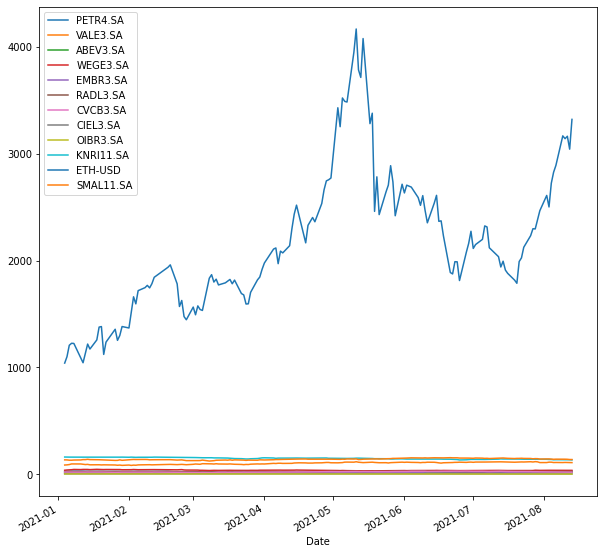

In [ ]:
precos.plot(figsize = (10,10));

In [ ]:
normalizado = precos/precos.iloc[0]

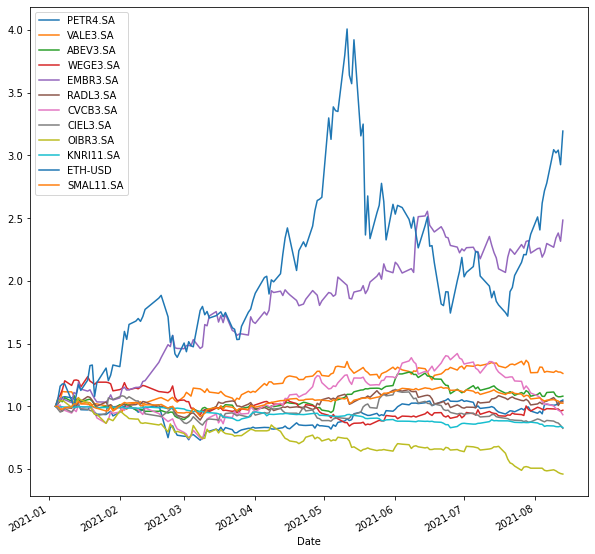

In [ ]:
normalizado.plot(figsize = (10,10));

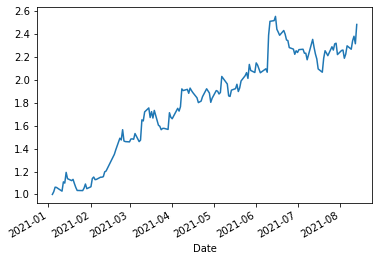

In [ ]:
normalizado['EMBR3.SA'].plot();

# 3. Cálculo dos retornos

In [ ]:
ativos_retornos = precos.pct_change()

In [ ]:
ativos_retornos.head()

,PETR4.SA,VALE3.SA,ABEV3.SA,WEGE3.SA,EMBR3.SA,RADL3.SA,CVCB3.SA,CIEL3.SA,OIBR3.SA,KNRI11.SA,ETH-USD,SMAL11.SA
Date,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.039087,0.016838,0.021318,0.061378,0.023895,-0.002797,0.002975,-0.023077,0.055319,-0.005415,0.057461,-0.002239
2021-01-06,0.001997,0.032796,0.020240,0.026515,0.038506,-0.023237,0.007415,-0.023622,-0.016129,0.000375,0.097369,-0.019746
2021-01-07,0.029900,0.065278,-0.004960,0.041328,-0.002247,-0.012715,-0.040236,0.008065,0.008197,0.000563,0.015380,-0.000839
2021-01-08,0.003871,-0.003127,0.029907,0.060477,-0.007883,0.029082,-0.002556,0.021333,-0.012195,-0.002501,-0.001208,0.012066


In [ ]:
ativos_retornos = ativos_retornos.dropna()

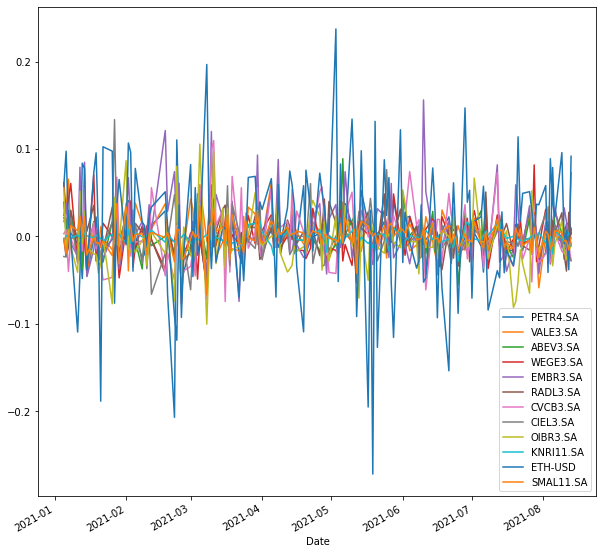

In [ ]:
ativos_retornos.plot(figsize = (10,10
));

# 4. Visualização de janela de volatilidade

In [ ]:
vol_movel = ativos_retornos.rolling(window = 20).std()

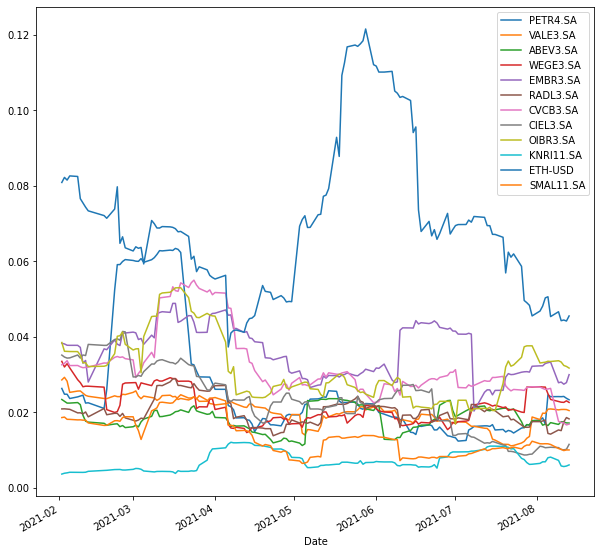

In [ ]:
vol_movel.plot(figsize = (10,10));

# 5. Criando um DF consolidado com retorno vs. volatilidade

In [ ]:
ativos_retornos.std()

PETR4.SA     0.029689
VALE3.SA     0.020953
ABEV3.SA     0.019125
WEGE3.SA     0.023425
EMBR3.SA     0.036287
RADL3.SA     0.020260
CVCB3.SA     0.032673
CIEL3.SA     0.024470
OIBR3.SA     0.031972
KNRI11.SA    0.007393
ETH-USD      0.071468
SMAL11.SA    0.014317
dtype: float64

In [ ]:
volatilidade = pd.DataFrame(ativos_retornos.std(), columns= ['Vol'] )

In [ ]:
retornos_medios = pd.DataFrame(ativos_retornos.mean(), columns= ['Returns'] )

In [ ]:
risco_retorno = pd.concat([retornos_medios, volatilidade], axis = 1)

In [ ]:
risco_retorno

,Returns,Vol
PETR4.SA,0.000777,0.029689
VALE3.SA,0.001759,0.020953
ABEV3.SA,0.000695,0.019125
WEGE3.SA,0.000058,0.023425
EMBR3.SA,0.006678,0.036287
RADL3.SA,0.000441,0.020260
CVCB3.SA,0.000062,0.032673
CIEL3.SA,-0.000984,0.024470
OIBR3.SA,-0.004629,0.031972
KNRI11.SA,-0.001199,0.007393


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
risco_retorno.shape[0]

12

In [ ]:
range(risco_retorno.shape[0])

range(0, 12)

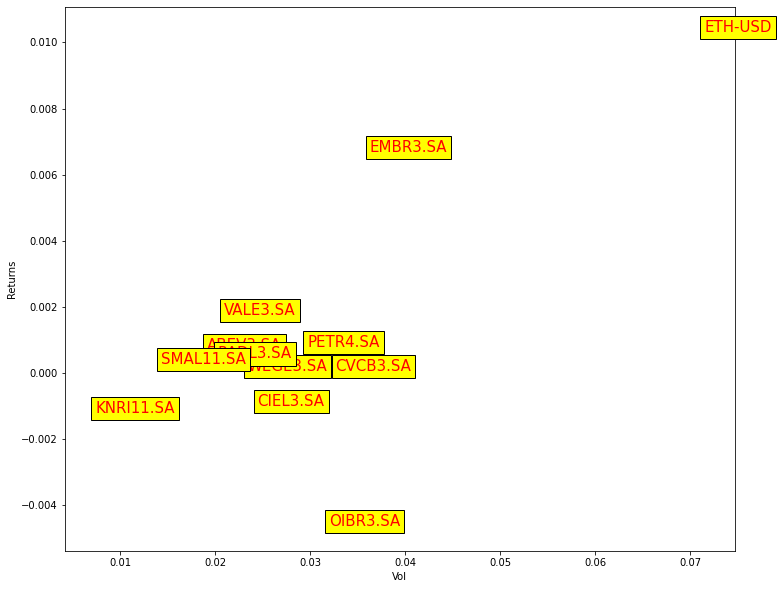

In [ ]:
plt.subplots(figsize = (12,10))

sns.scatterplot(data = risco_retorno, x = 'Vol', y = 'Returns')

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i], y = risco_retorno.Returns[i], s = risco_retorno.index[i],
           fontdict = dict(color = 'red', size = 15),
           bbox = dict(facecolor = 'yellow'))

### Sem Ethereum

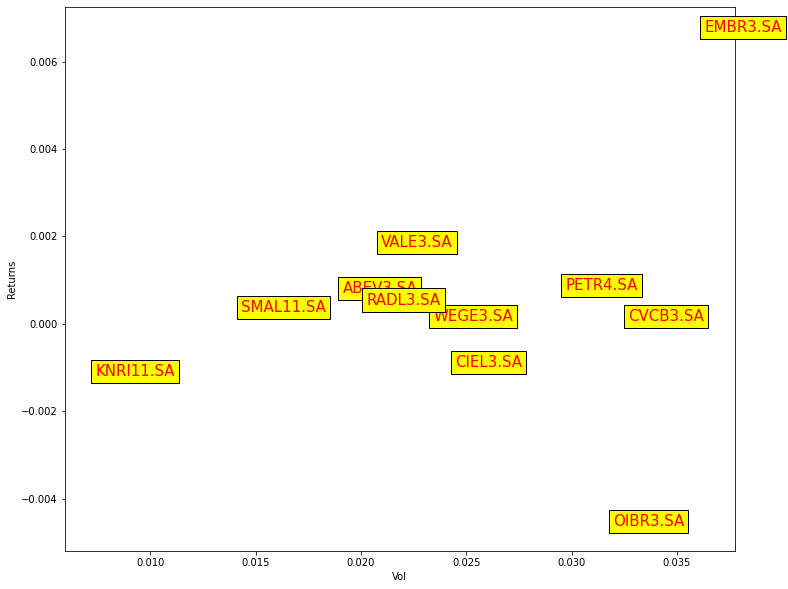

In [ ]:
plt.subplots(figsize = (12,10))

data = risco_retorno.drop(['ETH-USD'])

sns.scatterplot(data = data, x = 'Vol', y = 'Returns')

for i in range(data.shape[0]):
  plt.text(x = data.Vol[i], y = data.Returns[i], s = data.index[i],
           fontdict = dict(color = 'red', size = 15),
           bbox = dict(facecolor = 'yellow'))

## 6. Simulação de uma carteira vs. IBOV

In [ ]:
primeira = precos.iloc[0]

In [ ]:
comprados = 1000/primeira

In [ ]:
PL = precos*comprados

In [ ]:
PL.tail()

,PETR4.SA,VALE3.SA,ABEV3.SA,WEGE3.SA,EMBR3.SA,RADL3.SA,CVCB3.SA,CIEL3.SA,OIBR3.SA,KNRI11.SA,ETH-USD,SMAL11.SA
Date,,,,,,,,,,,,
2021-08-09,1007.912639,1270.179273,1113.810357,978.919890,2267.622437,1069.181357,1002.478891,881.959913,493.617027,843.094593,3045.333212,1053.059706
2021-08-10,1011.130558,1282.413769,1084.601994,977.024865,2341.696613,1047.557428,982.647477,871.522466,485.106397,837.742003,3020.180157,1047.388105
2021-08-11,1025.074682,1273.208716,1075.515003,978.649216,2381.123128,1005.911454,968.269738,866.303773,472.340451,836.621645,3041.861794,1041.791090
2021-08-12,1040.449072,1272.393083,1076.164091,961.323113,2315.412118,1033.541928,959.345578,848.038349,463.829820,840.231540,2925.704349,1025.522374
2021-08-13,1049.387624,1261.906398,1080.707587,968.361865,2483.871111,1036.345013,932.573098,824.554233,459.574505,830.895634,3193.718683,1024.253731


In [ ]:
PL['PL Total'] = PL.iloc[:].sum(axis = 1)

In [ ]:
PL.head()

,PETR4.SA,VALE3.SA,ABEV3.SA,WEGE3.SA,EMBR3.SA,RADL3.SA,CVCB3.SA,CIEL3.SA,OIBR3.SA,KNRI11.SA,ETH-USD,SMAL11.SA,PL Total
Date,,,,,,,,,,,,,
2021-01-04,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,12000.000000
2021-01-05,1039.086800,1016.837867,1021.317908,1061.377527,1023.894840,997.203255,1002.974688,976.922997,1055.319200,994.585205,1057.461232,997.761171,12244.742690
2021-01-06,1041.162182,1050.185835,1041.989700,1089.520142,1063.321355,974.031061,1010.411457,953.846056,1038.297939,994.958626,1160.424775,978.059683,12396.208811
2021-01-07,1072.293278,1118.740350,1036.821690,1134.548304,1060.931928,961.646008,969.757035,961.538349,1046.808569,995.518758,1178.272620,977.238783,12514.115672
2021-01-08,1076.444115,1115.241528,1067.829562,1203.162657,1052.568762,989.612470,967.278144,982.051109,1034.042624,993.029221,1176.848942,989.029842,12647.138975


In [ ]:
PL.tail()

,PETR4.SA,VALE3.SA,ABEV3.SA,WEGE3.SA,EMBR3.SA,RADL3.SA,CVCB3.SA,CIEL3.SA,OIBR3.SA,KNRI11.SA,ETH-USD,SMAL11.SA,PL Total
Date,,,,,,,,,,,,,
2021-08-09,1007.912639,1270.179273,1113.810357,978.919890,2267.622437,1069.181357,1002.478891,881.959913,493.617027,843.094593,3045.333212,1053.059706,15027.169296
2021-08-10,1011.130558,1282.413769,1084.601994,977.024865,2341.696613,1047.557428,982.647477,871.522466,485.106397,837.742003,3020.180157,1047.388105,14989.011832
2021-08-11,1025.074682,1273.208716,1075.515003,978.649216,2381.123128,1005.911454,968.269738,866.303773,472.340451,836.621645,3041.861794,1041.791090,14966.670689
2021-08-12,1040.449072,1272.393083,1076.164091,961.323113,2315.412118,1033.541928,959.345578,848.038349,463.829820,840.231540,2925.704349,1025.522374,14761.955417
2021-08-13,1049.387624,1261.906398,1080.707587,968.361865,2483.871111,1036.345013,932.573098,824.554233,459.574505,830.895634,3193.718683,1024.253731,15146.149483


In [ ]:
ibov = yf.download('^BVSP', start = '2017-01-01', end = '2021-07-05')

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,59589.0,808700
2017-01-03,59631.0,61815.0,59631.0,61814.0,61814.0,3328300
2017-01-04,61811.0,61940.0,61302.0,61589.0,61589.0,2840800
2017-01-05,61594.0,62409.0,61594.0,62071.0,62071.0,3313000
2017-01-06,62072.0,62072.0,61396.0,61665.0,61665.0,2374800


In [ ]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

In [ ]:
ibov

,IBOV
Date,
2017-01-02,59589.0
2017-01-03,61814.0
2017-01-04,61589.0
2017-01-05,62071.0
2017-01-06,61665.0
...,...
2021-06-28,127429.0
2021-06-29,127327.0
2021-06-30,126802.0


In [ ]:
PL.index = pd.to_datetime(PL.index)

In [ ]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,IBOV,PETR4.SA,VALE3.SA,ABEV3.SA,WEGE3.SA,EMBR3.SA,RADL3.SA,CVCB3.SA,CIEL3.SA,OIBR3.SA,KNRI11.SA,ETH-USD,SMAL11.SA,PL Total
Date,,,,,,,,,,,,,,
2021-01-04,118558.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,12000.000000
2021-01-05,119223.0,1039.086800,1016.837867,1021.317908,1061.377527,1023.894840,997.203255,1002.974688,976.922997,1055.319200,994.585205,1057.461232,997.761171,12244.742690
2021-01-06,119851.0,1041.162182,1050.185835,1041.989700,1089.520142,1063.321355,974.031061,1010.411457,953.846056,1038.297939,994.958626,1160.424775,978.059683,12396.208811
2021-01-07,121956.0,1072.293278,1118.740350,1036.821690,1134.548304,1060.931928,961.646008,969.757035,961.538349,1046.808569,995.518758,1178.272620,977.238783,12514.115672
2021-01-08,125077.0,1076.444115,1115.241528,1067.829562,1203.162657,1052.568762,989.612470,967.278144,982.051109,1034.042624,993.029221,1176.848942,989.029842,12647.138975


In [ ]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [ ]:
PL_normalizado.head()

,IBOV,PETR4.SA,VALE3.SA,ABEV3.SA,WEGE3.SA,EMBR3.SA,RADL3.SA,CVCB3.SA,CIEL3.SA,OIBR3.SA,KNRI11.SA,ETH-USD,SMAL11.SA,PL Total
Date,,,,,,,,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.005609,1.039087,1.016838,1.021318,1.061378,1.023895,0.997203,1.002975,0.976923,1.055319,0.994585,1.057461,0.997761,1.020395
2021-01-06,1.010906,1.041162,1.050186,1.041990,1.089520,1.063321,0.974031,1.010411,0.953846,1.038298,0.994959,1.160425,0.978060,1.033017
2021-01-07,1.028661,1.072293,1.118740,1.036822,1.134548,1.060932,0.961646,0.969757,0.961538,1.046809,0.995519,1.178273,0.977239,1.042843
2021-01-08,1.054986,1.076444,1.115242,1.067830,1.203163,1.052569,0.989612,0.967278,0.982051,1.034043,0.993029,1.176849,0.989030,1.053928


In [ ]:
PL_normalizado.tail()

,IBOV,PETR4.SA,VALE3.SA,ABEV3.SA,WEGE3.SA,EMBR3.SA,RADL3.SA,CVCB3.SA,CIEL3.SA,OIBR3.SA,KNRI11.SA,ETH-USD,SMAL11.SA,PL Total
Date,,,,,,,,,,,,,,
2021-06-28,1.074824,1.038661,1.288706,1.135879,0.916368,2.268817,1.011117,1.420426,0.937998,0.655319,0.838924,1.999223,1.129627,1.220089
2021-06-29,1.073964,1.043309,1.310961,1.122248,0.935234,2.223417,1.002708,1.383738,0.943180,0.646809,0.852804,2.077196,1.124328,1.222161
2021-06-30,1.069536,1.052248,1.319584,1.107969,0.908012,2.254480,0.989493,1.374318,0.943180,0.642553,0.862700,2.186575,1.119403,1.230043
2021-07-01,1.059954,1.039019,1.296629,1.116407,0.923105,2.238949,0.985088,1.336143,0.935407,0.638298,0.864505,2.031858,1.111940,1.209779
2021-07-02,1.076452,1.043309,1.323429,1.131335,0.950327,2.264038,0.993097,1.341596,0.940589,0.680851,0.862015,2.066883,1.130597,1.227339


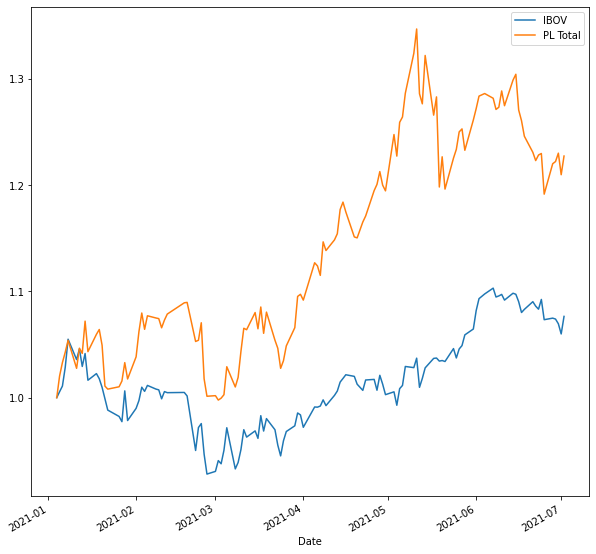

In [ ]:
PL_normalizado[['IBOV', 'PL Total']].plot(figsize = (10,10));